
# TP Data Science - Partie C : Classification (Pima Indians Diabetes)

**Objectif** : Prédire la présence de diabète (étiquette binaire) à l'aide de méthodes de classification.

## 1. Chargement du fichier `diabetes.csv`

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Nettoyage et prétraitement

In [2]:
import numpy as np
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)
df[cols_with_missing] = df[cols_with_missing].fillna(df[cols_with_missing].median())
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 3. Analyse exploratoire et déséquilibre des classes

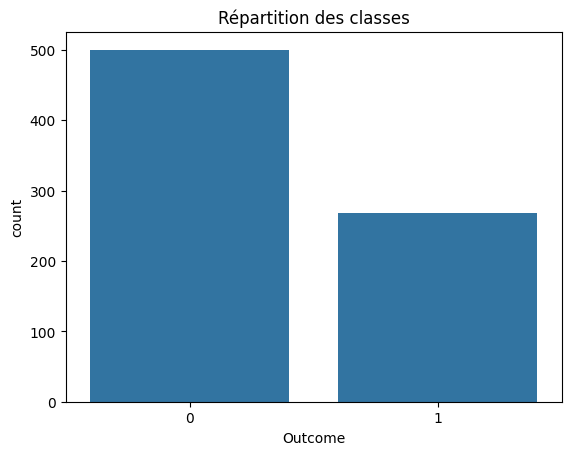

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Outcome', data=df)
plt.title('Répartition des classes')
plt.show()

## 4. Découpage en ensembles d'entraînement, validation et test

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
len(X_train), len(X_val), len(X_test)

(460, 154, 154)

## 5. Feature engineering et normalisation

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## 7. Modélisation initiale avec la régression logistique

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)
y_val_pred = clf.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



## 8. Évaluation finale sur le jeu de test

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       101
           1       0.66      0.51      0.57        53

    accuracy                           0.74       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.74      0.73       154



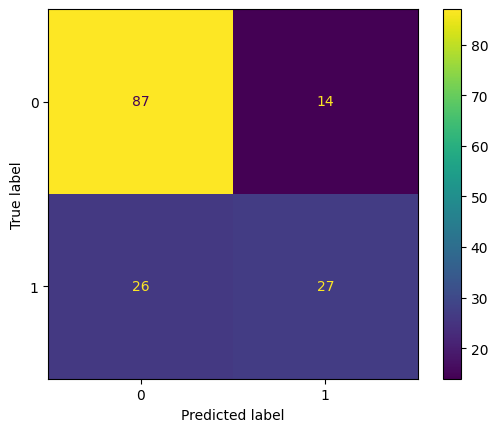

In [14]:
y_test_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

## 9. Analyse d'explicabilité

In [15]:
feature_names = X.columns
import numpy as np
importance = np.abs(clf.coef_[0])
sorted_idx = np.argsort(importance)[::-1]
for idx in sorted_idx:
    print(f'{feature_names[idx]}: {importance[idx]:.4f}')

Glucose: 1.1160
BMI: 0.7368
Pregnancies: 0.4166
DiabetesPedigreeFunction: 0.1343
Age: 0.1319
SkinThickness: 0.0618
BloodPressure: 0.0418
Insulin: 0.0382


## 10. Conclusions

- Le modèle de régression logistique donne une première estimation du risque de diabète.
- La normalisation a permis de stabiliser l’apprentissage.
- Des modèles plus avancés comme Random Forest ou XGBoost peuvent être testés pour comparaison.